In [40]:
#import the california housing dataset from sklearn.datasets package
from sklearn.datasets import fetch_california_housing
#import train_test_split to split the dataset into train and test set
from sklearn.model_selection import train_test_split
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#storing the dataset in a variable
dataset = fetch_california_housing()
#what's inside the dataset?
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [3]:
#description of the dataset e.g. number of instances and attributes, information about the attributes etc. 
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

## Convert the dataset to a pandas dataframe and check statistics

In [4]:
df = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
df["Y"] = dataset.target
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Y
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [5]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Y             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Y           20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Y
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


**Notice the ranges of the variables are not similar or even close. It's usually good to scale the variables to a range. To scale the attributes use normalization or standardization technique. Feature scaling often helps the algorithm to converge faster.**

## Feature scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(df)
type(scaled_data)

numpy.ndarray

In [10]:
df = pd.DataFrame(scaled_data)
df.head(10)

,0,1,2,3,4,5,6,7,8
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155,0.902266
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151,0.708247
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159,0.695051
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163,0.672783
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163,0.674638
5,0.243921,1.000000,0.027757,0.022835,0.011491,0.001165,0.564293,0.209163,0.525155
6,0.217873,1.000000,0.028964,0.018321,0.030578,0.001156,0.563231,0.209163,0.585979
7,0.180694,1.000000,0.028011,0.021596,0.032344,0.000882,0.563231,0.209163,0.466804
8,0.108998,0.803922,0.024443,0.023250,0.033717,0.001074,0.563231,0.208167,0.436495
9,0.220087,1.000000,0.029238,0.019472,0.043387,0.001191,0.563231,0.209163,0.507423


In [11]:
feature_names = dataset.feature_names
feature_names.append("Y")
print(feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'Y']


In [12]:
df.columns = feature_names
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Y
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155,0.902266
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151,0.708247
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159,0.695051
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163,0.672783
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163,0.674638
5,0.243921,1.000000,0.027757,0.022835,0.011491,0.001165,0.564293,0.209163,0.525155
6,0.217873,1.000000,0.028964,0.018321,0.030578,0.001156,0.563231,0.209163,0.585979
7,0.180694,1.000000,0.028011,0.021596,0.032344,0.000882,0.563231,0.209163,0.466804
8,0.108998,0.803922,0.024443,0.023250,0.033717,0.001074,0.563231,0.208167,0.436495
9,0.220087,1.000000,0.029238,0.019472,0.043387,0.001191,0.563231,0.209163,0.507423


In [13]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Y
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.232464,0.541951,0.032488,0.022629,0.039869,0.001914,0.328572,0.476125,0.395579
std,0.131020,0.246776,0.017539,0.014049,0.031740,0.008358,0.226988,0.199555,0.237928
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142308,0.333333,0.025482,0.019943,0.021974,0.001398,0.147715,0.253984,0.215671
50%,0.209301,0.549020,0.031071,0.021209,0.032596,0.001711,0.182784,0.583665,0.339588
75%,0.292641,0.705882,0.036907,0.022713,0.048264,0.002084,0.549416,0.631474,0.514897
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Now all the attributes are rescaled to a range 0 to 1. I have made it easy for the algorithm to converge faster.**

**But there's another thing to consider. It's good to randomize the instances before training. Since it's possible that there's some bias in the data. So it's always good to shuffle the dataset before going to apply the algorithm. Otherwise the trained model will not perform well if there's any sort of bias in the dataset.**

## Randomize the training instances

In [14]:
#randomize the intstances before splitting the dataset into train and test set
from sklearn.utils import shuffle
df = shuffle(df, random_state = 9)
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Y
20558,0.279493,0.176471,0.033123,0.019920,0.029990,0.001727,0.651435,0.253984,0.287424
11430,0.369250,0.411765,0.039712,0.019421,0.052356,0.001923,0.119022,0.635458,0.549484
2656,0.099433,0.607843,0.048212,0.056541,0.012080,0.001311,0.822529,0.009960,0.125981
14267,0.075406,0.705882,0.022346,0.021149,0.069677,0.002787,0.015940,0.721116,0.147012
3684,0.183197,0.686275,0.026569,0.022013,0.033017,0.002579,0.177471,0.595618,0.332784
17826,0.363416,0.039216,0.028215,0.021470,0.070602,0.001493,0.514346,0.245020,0.528660
6766,0.186039,0.450980,0.023907,0.021852,0.069369,0.001244,0.165781,0.619522,0.489485
1029,0.127929,0.333333,0.034028,0.028324,0.017237,0.001238,0.625930,0.378486,0.193610
7108,0.257190,0.627451,0.039327,0.020411,0.028448,0.002003,0.143464,0.631474,0.407835
9840,0.137398,0.392157,0.018324,0.017961,0.023291,0.001297,0.432519,0.242032,0.471753


## Splitting the dataset into train and test set

**Split the dataset into train and test set. Since I have already shuffled the dataset so I set the train_test_split parameter shuffle to False.**

In [15]:
#split the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(df[df.keys()[0:8]], df[df.keys()[8]], test_size = 0.2, shuffle = False)
#test_size = 0.2 means 20% of the data will be used for testing

In [16]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16512, 8), (16512,), (4128, 8), (4128,))

In [17]:
X_train.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20558,0.279493,0.176471,0.033123,0.019920,0.029990,0.001727,0.651435,0.253984
11430,0.369250,0.411765,0.039712,0.019421,0.052356,0.001923,0.119022,0.635458
2656,0.099433,0.607843,0.048212,0.056541,0.012080,0.001311,0.822529,0.009960


In [19]:
y_train.head(3)

20558    0.287424
11430    0.549484
2656     0.125981
Name: Y, dtype: float64

# Exploratory Data Analysis (EDA) and Feature Engineering

In [20]:
#run functions from another notebook named plot-functions.ipynb
%run plot_funcs.ipynb

In [21]:
df = pd.concat([X_train, y_train], axis = 1)
df.shape

(16512, 9)

## Data distribution of each variable and the target

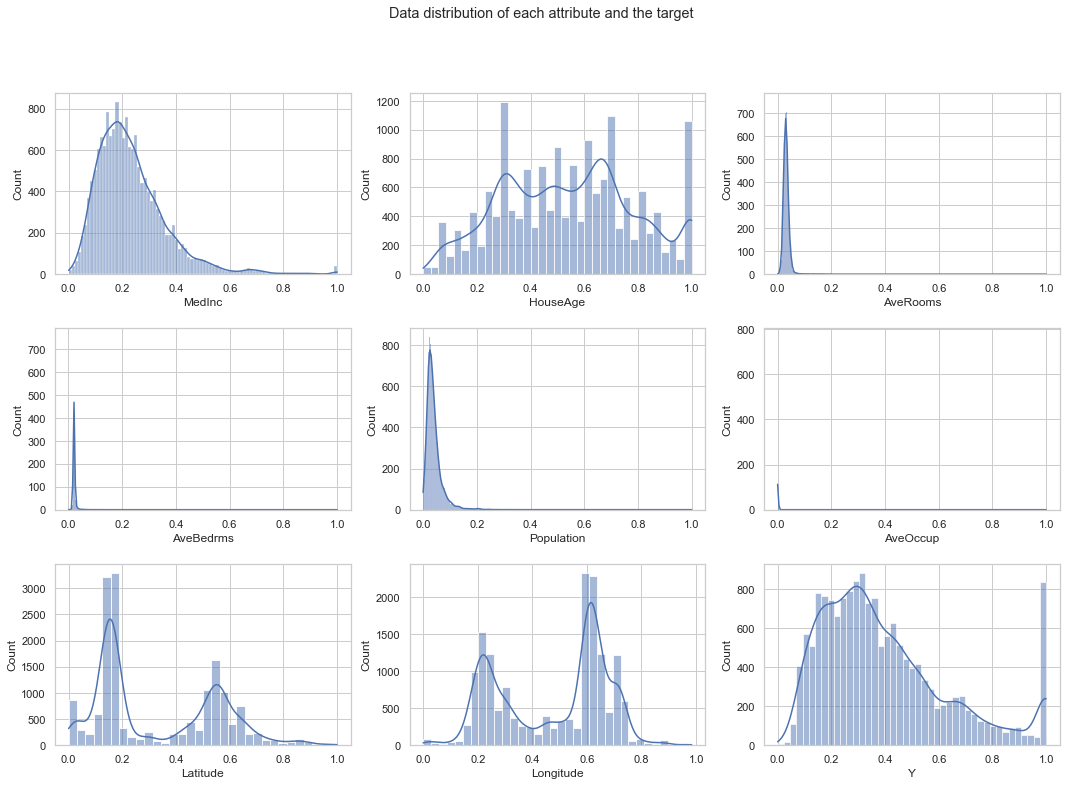

In [22]:
histplot(3, 3, data = df, grid = "whitegrid", hspace = 0.3, figsize = (18, 12), suptitle = "Data distribution of each attribute and the target")

## Pairwise relationships between the variables and the target

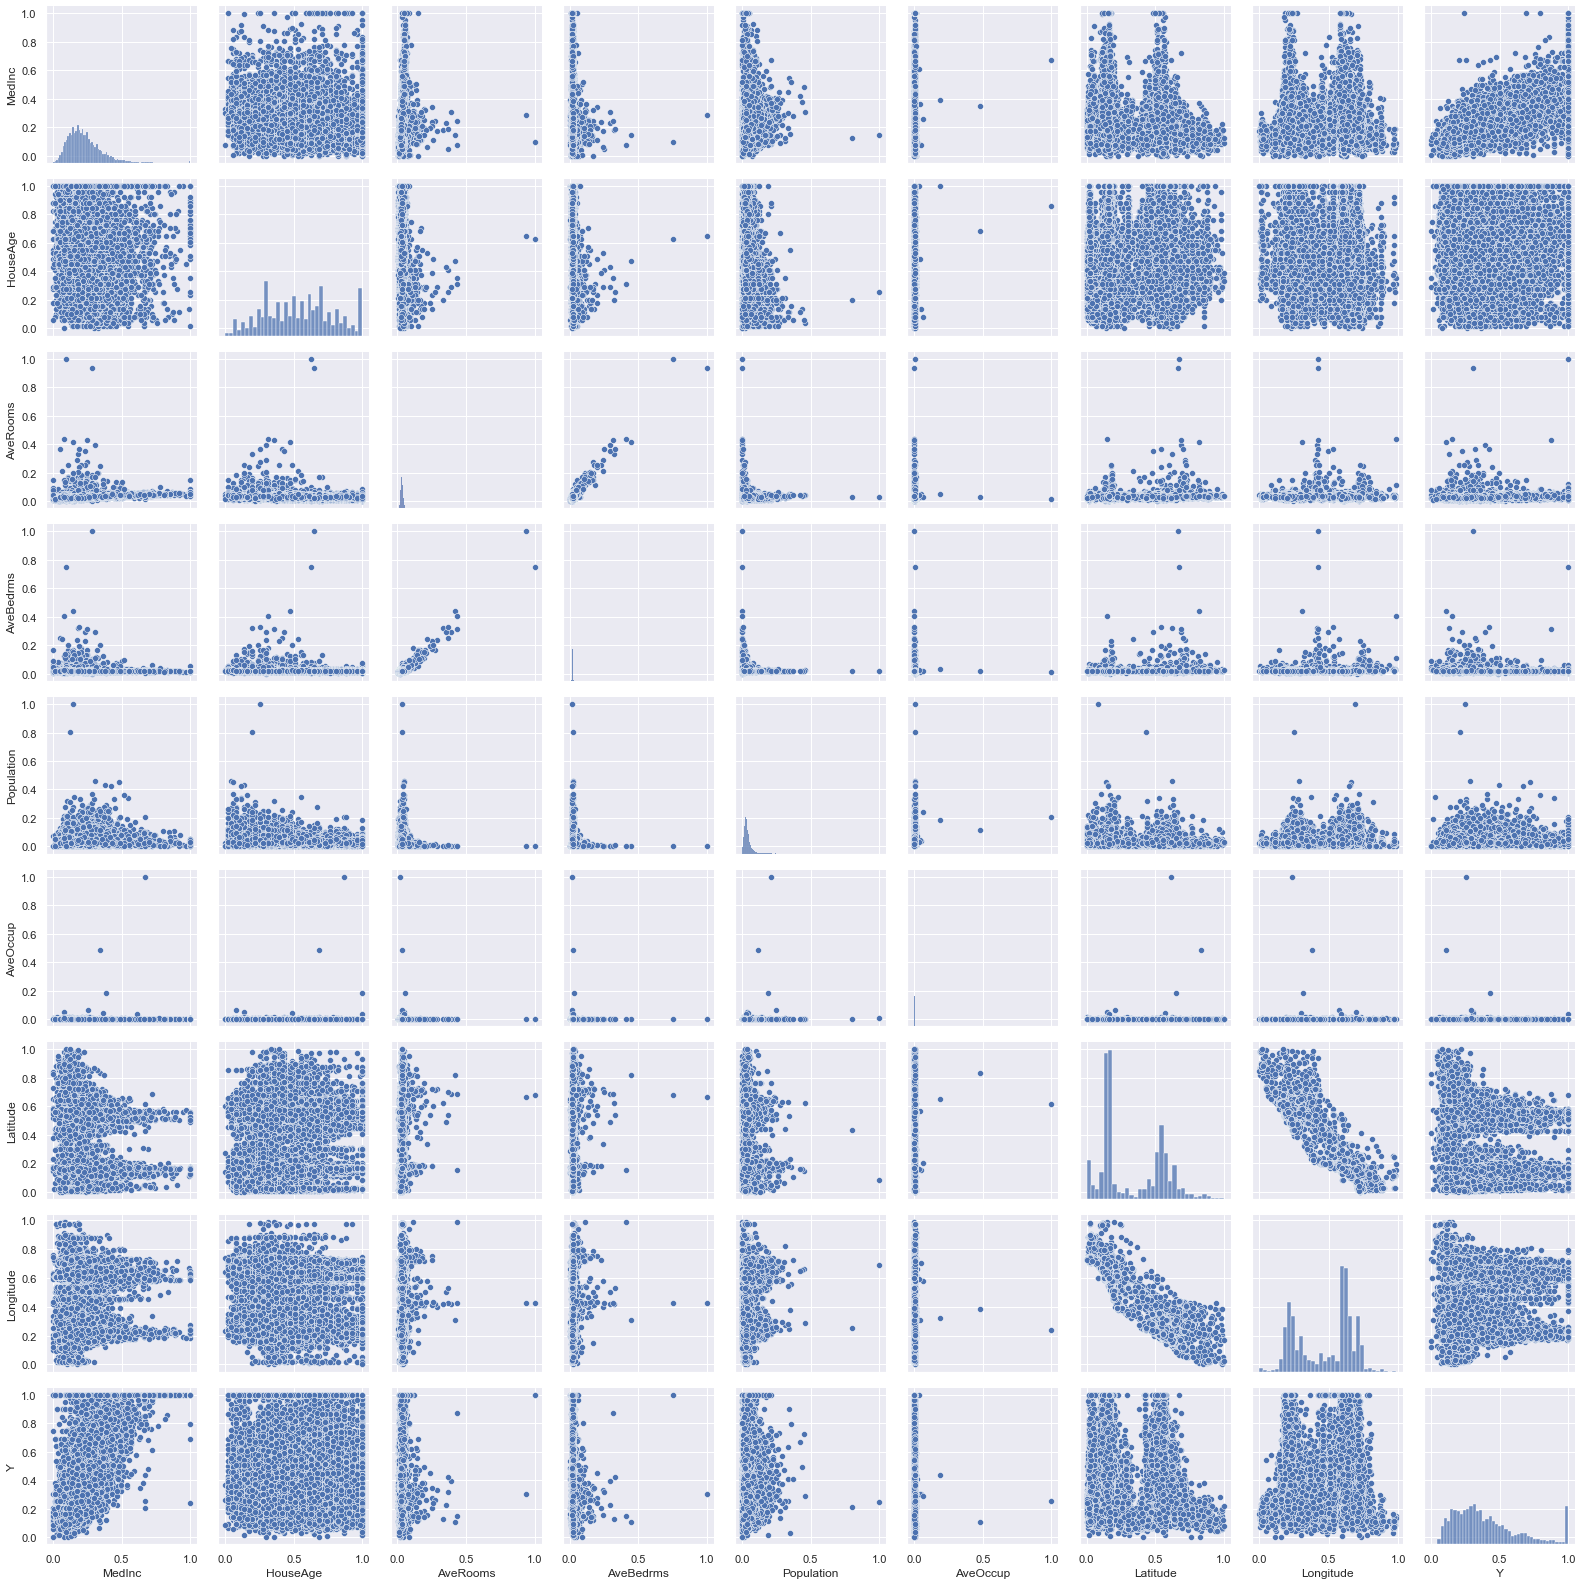

In [23]:
#pairwise relationships between the variables and the target
pairgrid(data = df, diag = sns.histplot, upper = sns.scatterplot, lower = sns.scatterplot)

## Correlation matrix

**Correlation matrix visualize the linear relationships between the variables and the target. The correlation coefficient ranges from -1 to 1. If the value is close to 1, there's a strong positive correlation between the variables. There's a strong negative correlation if the value is close to -1. It's recommened to use the variables that are highly correlated with the target and omit the other variables.**

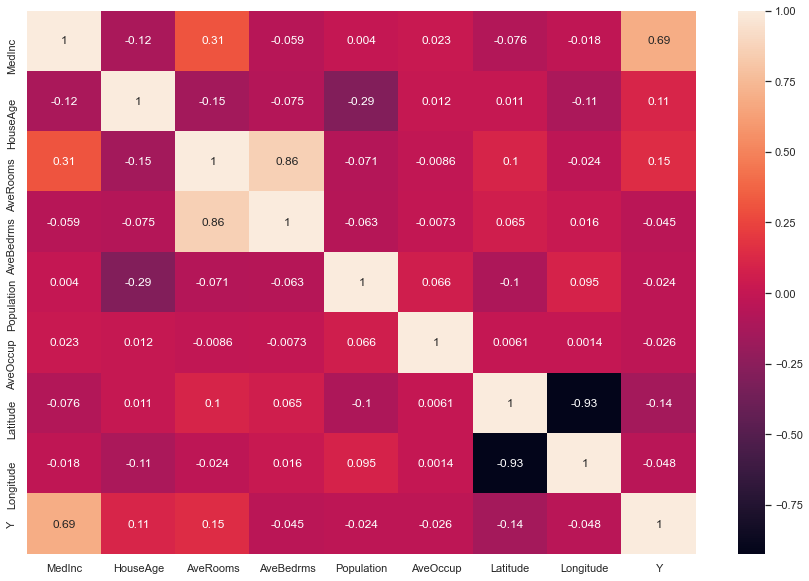

In [24]:
sns.set(rc = {"figure.figsize": (15, 10)})
df = pd.concat([X_train, y_train], axis = 1)
corr_matrix = df.corr()
sns.heatmap(data = corr_matrix, annot = True)
#prints the values inside the squares if annot is True
plt.show()

**We should choose the variables that are highly correlated with the target. But always check for multi-co-linearity while choosing the attributes. If two features are highly correlated with the target and those two are strongly correlated with each other then choose one of those, not both. In this dataset only one feature is highly correlated with the target that is "MedInc" (>0.5) with correlation coefficient 0.69.**

## Boxplot and Violinplot to check if there's any outliers

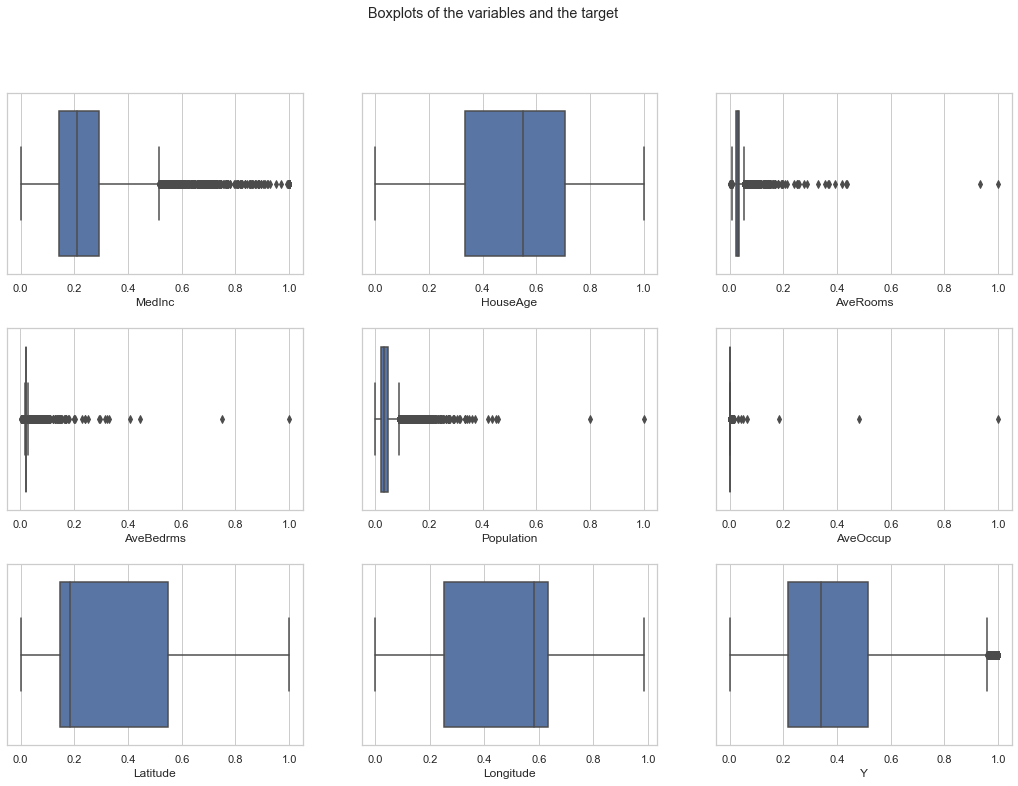

In [25]:
boxplot(3, 3, data = df, grid = "whitegrid", hspace = 0.3, figsize = (18, 12), suptitle = "Boxplots of the variables and the target")

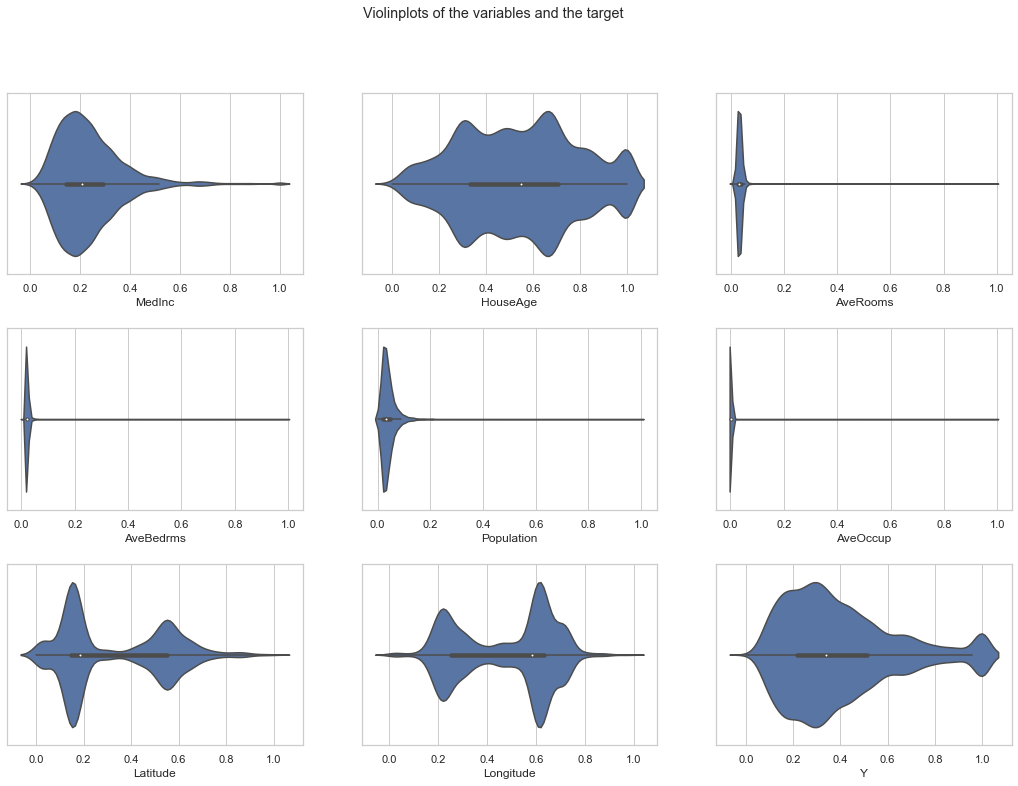

In [26]:
violinplot(3, 3, data = df, grid = "whitegrid", hspace = 0.3, figsize = (18, 12), suptitle = "Violinplots of the variables and the target")

## Dealing with the outliers

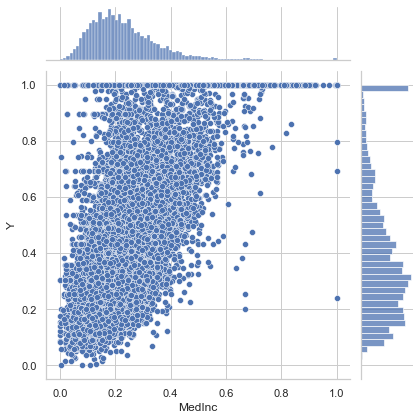

In [27]:
temp = pd.concat([X_train["MedInc"], y_train], axis = 1)
sns.jointplot(data = temp, x = "MedInc", y = "Y")
plt.show()

In [28]:
temp = pd.concat([X_train["MedInc"], y_train], axis = 1)
temp.loc[temp["Y"] == 1] = temp["Y"].mean()

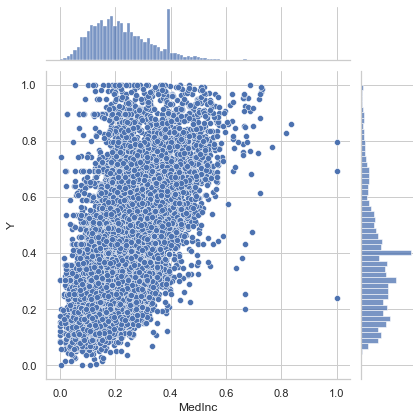

In [29]:
sns.jointplot(data = temp, x = "MedInc", y = "Y")
plt.show()

In [30]:
X_train1, y_train1, X_test, y_test = pd.DataFrame(df["MedInc"]), pd.DataFrame(df["Y"]), pd.DataFrame(X_test["MedInc"]), pd.DataFrame(y_test)

In [31]:
from sklearn.linear_model import LinearRegression
lin_model1 = LinearRegression()

In [32]:
lin_model1.fit(X_train1, y_train1)

LinearRegression()

In [33]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_test, lin_model1.predict(X_test))
mse1

0.029643214650269423

In [34]:
X_train2, y_train2 = pd.DataFrame(temp["MedInc"]), pd.DataFrame(temp["Y"])

In [35]:
lin_model2 = LinearRegression()

In [36]:
lin_model2.fit(X_train2, y_train2)

LinearRegression()

In [37]:
mse2 = mean_squared_error(y_test, lin_model2.predict(X_test))
mse2

0.030548909545286114

<AxesSubplot:>

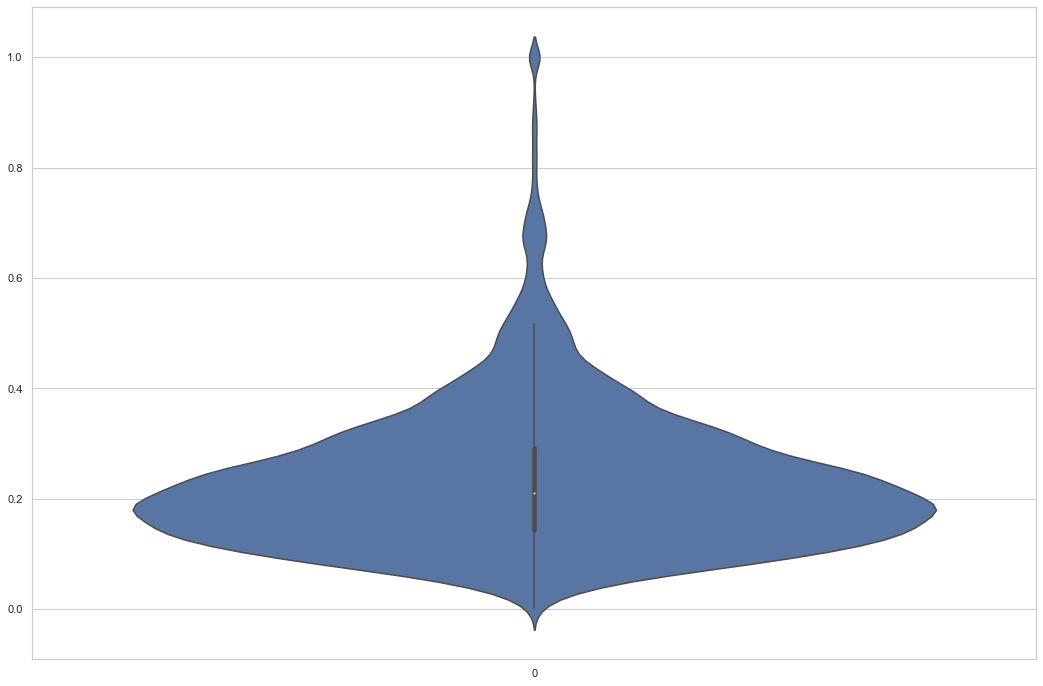

In [38]:
sns.violinplot(data = df["MedInc"])

<AxesSubplot:>

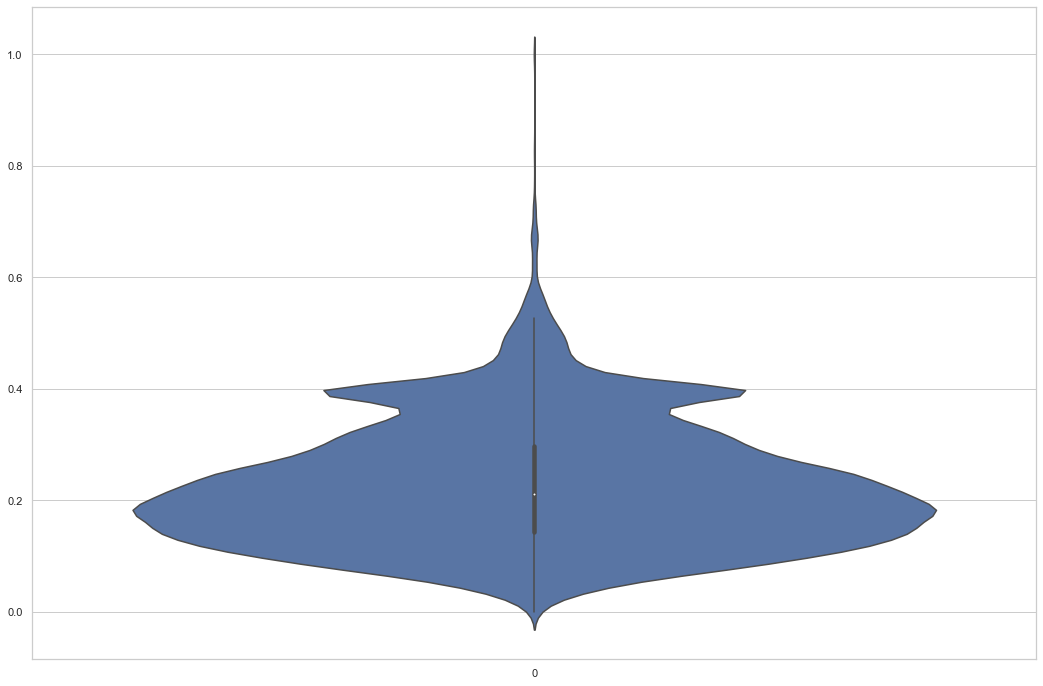

In [39]:
sns.violinplot(data = temp["MedInc"])

**It's not always true that removing or replacing outliers with mean or other stastic would be a good idea. Check before doing that.**

# Implementing Decision Tree Regressor and Linear Regression with Cross Validation

In [77]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

In [78]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X_train1, y_train1, scoring = "neg_mean_squared_error", cv = 10)
tree_mse_scores = -scores

**sklearn's cross validation expect a utility duncrions rather than a cost function, so the scoring function is actually the opposite of the MSE ("neg_mean_squared_error") that's why the preceeding code computes -scores before calculating the squared root.**

In [79]:
print("mse scores for each combination: ",tree_mse_scores)
print("mean: ", tree_mse_scores.mean())
print("std: ", tree_mse_scores.std())

mse scores for each combination:  [0.04710534 0.04939907 0.04805247 0.04612888 0.04939885 0.04852754
 0.04952684 0.04722959 0.04924499 0.05357555]
mean:  0.048818913548550266
std:  0.0019326693371953824


In [81]:
lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, X_train1, y_train1, scoring = "neg_mean_squared_error", cv = 10)
lin_mse_scores = -scores

In [82]:
print("mse scores for each combination: ",lin_mse_scores)
print("mean: ", lin_mse_scores.mean())
print("std: ", lin_mse_scores.std())

mse scores for each combination:  [0.03035061 0.03044558 0.02975849 0.02921918 0.02911368 0.02860164
 0.03150698 0.02845499 0.0287117  0.03242717]
mean:  0.02985900199925069
std:  0.0012546134409962349


# Random Forest

In [87]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
scores = cross_val_score(forest_reg, X_train1, y_train1, scoring = "neg_mean_squared_error", cv = 10)
forest_mse_scores = -scores

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed whe

In [88]:
print("mse scores for each combination: ",forest_mse_scores)
print("mean: ", forest_mse_scores.mean())
print("std: ", forest_mse_scores.std())

mse scores for each combination:  [0.03815188 0.03991838 0.03846661 0.03767177 0.03937789 0.03888886
 0.04058957 0.03762286 0.03897006 0.04295745]
mean:  0.03926153244632159
std:  0.0015221087510813975


# Grid Search for Hyperparameter Optimization

In [90]:
X_train, X_test, y_train, y_test = train_test_split(df[df.keys()[0:8]], df[df.keys()[8]], test_size = 0.2, shuffle = False)

In [91]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13209, 8), (3303, 8), (13209,), (3303,))

In [92]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {"n_estimators": [3, 10, 30], "max_features": [2, 4, 6, 8]},
    {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2, 3, 4]}
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = "neg_mean_squared_error", return_train_score = True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [93]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [94]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=30)

In [95]:
forest_reg = RandomForestRegressor(n_estimators = 30, max_features = 2)
forest_reg.fit(X_train, y_train)
mse = mean_squared_error(y_test, forest_reg.predict(X_test))
print(mse)

0.011399261422823118


# Lasso Regression, Ridge Regression and Elastic Net

In [116]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X_train, y_train)
mse = mean_squared_error(y_test, ridge_reg.predict(X_test))
print(mse)

0.023401754122248725


In [117]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X_train, y_train)
mse = mean_squared_error(y_test, lasso_reg.predict(X_test))
print(mse)

0.058348757462874094


In [118]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X_train, y_train)
mse = mean_squared_error(y_test, elastic_net.predict(X_test))
print(mse)

0.058348757462874094
